In [1]:
import gc
gc.collect()

0

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Set the directory paths for the classes
classes = ['High squamous intra-epithelial lesion', 
           'Low squamous intra-epithelial lesion', 
           'Negative for Intraepithelial malignancy', 
           'Squamous cell carcinoma']

# Initialize the image list and class labels
image_paths = []
labels = []

# Loop through the directories and collect images
for label, class_name in enumerate(classes):
    class_dir = f'data/{class_name}'  # Correct path based on your structure
    for img_file in os.listdir(class_dir):
        if img_file.endswith(".jpg"):
            image_paths.append(os.path.join(class_dir, img_file))
            labels.append(class_name)

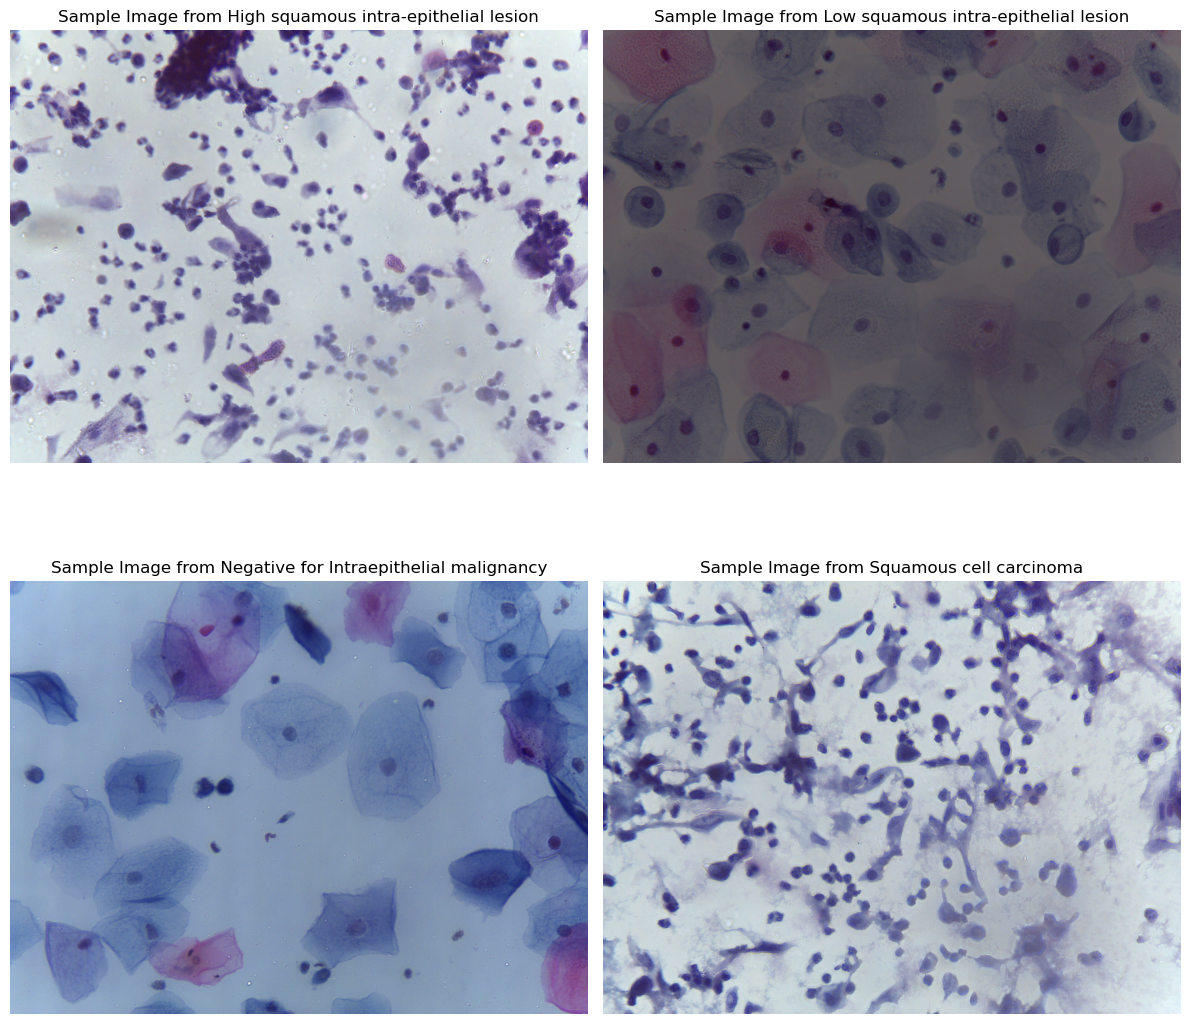

In [3]:
import random
# Show a few sample images from each class
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for i, (class_name, ax) in enumerate(zip(classes, axes)):
    # Find one image from each class
    class_images = [img for img, label in zip(image_paths, labels) if label == class_name]
    img_path = class_images[random.randint(0,112)] 
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.set_title(f"Sample Image from {class_name}")
    ax.axis('off')

plt.tight_layout()
plt.show()

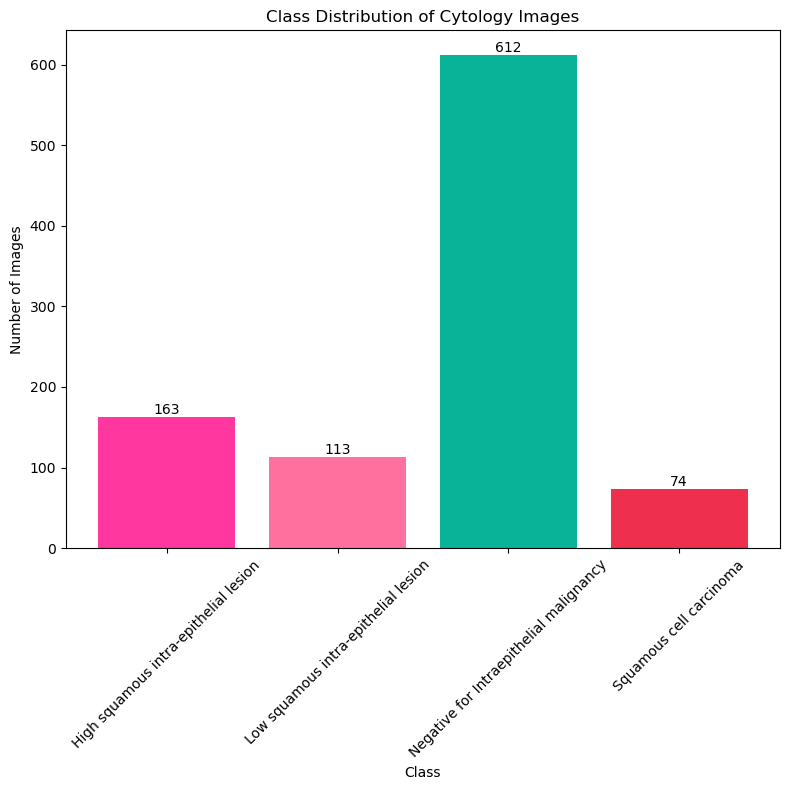

In [4]:
plt.figure(figsize=(8, 8))
class_counts = [labels.count(class_name) for class_name in classes]

# Plot the histogram with pastel colors
bars = plt.bar(classes, class_counts, color=['#FF379E', '#FF709E', '#08B397', '#EE304E'])
plt.title('Class Distribution of Cytology Images')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)

# Add class counts over each bar
for bar, count in zip(bars, class_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(count), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [3]:
from PIL import Image

# Specify the path to your image
image_path = 'data/High squamous intra-epithelial lesion/HSIL_1 (1).jpg'  # Change this to any image path you want

# Open the image
img = Image.open(image_path)

# Get the resolution (width and height)
width, height = img.size

# Print the resolution
print(f"The resolution of the image is: {width}x{height}")


The resolution of the image is: 2048x1536


In [6]:
def extract_patches(image_path):
    """
    Extracts 256x256 patches from a 2048x1536 image and returns them as a list of images.
    
    Parameters:
    - image_path (str): Path to the input image (2048x1536 jpg image).
    
    Returns:
    - patches (list): List of PIL Image objects representing the extracted 256x256 patches.
    """
    # Open the image
    img = Image.open(image_path)
    
    # Define the patch size and grid dimensions
    patch_size = 256
    grid_width = 8  # Number of patches across the width (2048 / 256 = 8)
    grid_height = 6  # Number of patches down the height (1536 / 256 = 6)
    
    # Get the base name of the image (to use for patch naming)
    base_name = os.path.splitext(os.path.basename(image_path))[0]
    
    patches = []  # List to store the patches
    
    # Loop over the grid and extract patches
    patch_count = 0
    for i in range(grid_height):
        for j in range(grid_width):
            # Define the left, upper, right, and lower coordinates for the patch
            left = j * patch_size
            upper = i * patch_size
            right = left + patch_size
            lower = upper + patch_size
            
            # Extract the patch
            patch = img.crop((left, upper, right, lower))
            patches.append(patch)  # Add the patch to the list
            
            # Optionally: You can keep track of the patch names if needed for later use
            patch_name = f"{base_name}_p_{patch_count + 1}.jpg"
            patch_count += 1
    
    # Return the list of extracted patches
    return patches

In [7]:
def save_patches_from_directory(data_dir, output_dir):
    """
    Iterates through the data directory, extracts patches from each image, and saves them in class subdirectories.
    
    Parameters:
    - data_dir (str): Path to the root directory containing subdirectories for each class.
    - output_dir (str): Path to the directory where the patches will be saved.
    """
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Iterate over each class directory
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        
        if os.path.isdir(class_dir):
            # Create a subdirectory for each class in the output folder
            class_output_dir = os.path.join(output_dir, class_name)
            if not os.path.exists(class_output_dir):
                os.makedirs(class_output_dir)
            
            # Iterate over all image files in the class directory
            for img_file in os.listdir(class_dir):
                if img_file.endswith(".jpg"):
                    img_path = os.path.join(class_dir, img_file)
                    
                    # Extract patches from the image
                    patches = extract_patches(img_path)
                    
                    # Save each patch
                    for idx, patch in enumerate(patches):
                        patch_name = f"{os.path.splitext(img_file)[0]}_p_{idx + 1}.jpg"
                        patch.save(os.path.join(class_output_dir, patch_name))
                    
                    # print(f"Processed {img_file} into {len(patches)} patches in class '{class_name}'")
                    
# Example usage:
data_dir = "data"  # Replace with the path to your data directory
output_dir = "./patches"  # Path to the folder where patches will be saved
save_patches_from_directory(data_dir, output_dir)


In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torch.nn.functional as F
# from transformers import ViTForImageClassification, ViTConfig
# from torch.utils.data import DataLoader, Dataset
# from torchvision import transforms
# import numpy as np


/home/arjun.j/miniconda3/envs/cervic-ai/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/arjun.j/miniconda3/envs/cervic-ai/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [ ]:
# from torch.nn import DataParallel as DP

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# print(f"Using device: {device}")

# # Load the pretrained ViT model and adjust it for your task (e.g., 4 output classes)
# model_name = "google/vit-base-patch16-224-in21k"  # You can use ViT-B32 or other variants
# model = ViTForImageClassification.from_pretrained(model_name, num_labels=4, output_hidden_states=True)

# # Conditionally use DataParallel if more than 1 GPU is available
# if torch.cuda.device_count() > 1:
#     print("Using multiple GPUs with DataParallel.")
#     model = DP(model)  # Wrap the model with DataParallel
# else:
#     print("Using single GPU or CPU.")

# model = model.to(device)  # Move model to the appropriate device (GPU/CPU)

Using device: cuda


/home/arjun.j/miniconda3/envs/cervic-ai/lib/python3.10/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using multiple GPUs with DataParallel.


In [7]:
# from torchvision import transforms
# Function to calculate mean and std for the dataset
def calculate_mean_std(image_paths, transform=None):
    means = []
    stds = []
    
    for image_path in image_paths:
        img = Image.open(image_path).convert('RGB')
        
        if transform:
            img = transform(img)  # Apply transformations (e.g., ToTensor)
        
        # Convert image to tensor and calculate the mean and std for each channel (RGB)
        means.append(img.mean(dim=(1, 2)))  # Mean for R, G, B
        stds.append(img.std(dim=(1, 2)))    # Std for R, G, B
    
    # Convert lists to numpy arrays
    means = torch.stack(means).numpy()
    stds = torch.stack(stds).numpy()
    
    # Calculate mean and std for all images in the dataset
    dataset_mean = means.mean(axis=0)
    dataset_std = stds.mean(axis=0)
    
    return dataset_mean, dataset_std


In [8]:
# Function to get 10 images from each class subdirectory
def get_image_paths(data_dir, num_images_per_class=80):
    image_paths = []
    
    # Iterate over each class subdirectory
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        
        if os.path.isdir(class_dir):
            # Get all .jpg image paths in the class directory
            img_files = [f for f in os.listdir(class_dir) if f.endswith('.jpg')]
            
            # Randomly sample 10 images (or all if fewer than 10)
            sampled_files = random.sample(img_files, min(num_images_per_class, len(img_files)))
            image_paths.extend([os.path.join(class_dir, f) for f in sampled_files])
    
    return image_paths


# Main execution
data_dir = 'data'  # Your data directory
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to 256x256
    transforms.ToTensor(),          # Convert to tensor
])

# Get image paths from the dataset
image_paths = get_image_paths(data_dir, num_images_per_class=10)

# Calculate mean and std
mean, std = calculate_mean_std(image_paths, transform)

# Print the results
print(f"Dataset Mean: {mean}")
print(f"Dataset Std: {std}")

Dataset Mean: [0.5568156  0.58998084 0.65810484]
Dataset Std: [0.12085549 0.13452323 0.08705737]


In [82]:
import os
from torch.utils.data import Dataset, random_split
from torchvision import transforms
from PIL import Image
import torch

class PatchDataset(Dataset):
    def __init__(self, data_dir, patch_size=224, transform=None):
        self.image_paths = []  # List of image paths
        self.labels = []       # Corresponding labels
        self.patch_size = patch_size  # Patch size (224x224)

        self.class_to_idx = {
            "Negative for Intraepithelial malignancy": 0,  # NILM
            "Low squamous intra-epithelial lesion": 1,     # LSIL
            "High squamous intra-epithelial lesion": 2,    # HSIL
            "Squamous cell carcinoma": 3                   # SCC
        }

        # Loop through each class subdirectory and collect image paths and labels
        for class_name in os.listdir(data_dir):
            class_dir = os.path.join(data_dir, class_name)
            if os.path.isdir(class_dir):
                if class_name in self.class_to_idx:
                    for img_file in os.listdir(class_dir):
                        if img_file.endswith('.jpg'):  # Assuming .jpg images
                            img_path = os.path.join(class_dir, img_file)
                            self.image_paths.append(img_path)
                            self.labels.append(self.class_to_idx[class_name])  # Get label from class directory

        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]

        # Open image
        img = Image.open(img_path).convert('RGB')

        # Resize the image to 1792x1344 (if needed, based on your patch size)
        img = img.resize((1792, 1344))

        # Split the image into 224x224 patches
        patches = self.extract_patches(img)

        # Apply transformations to each patch (if defined)
        if self.transform:
            patches = [self.transform(patch) for patch in patches]  # Apply transformations
        
        # Convert list of patches into a tensor (48, 3, 224, 224)
        patch_tensor = torch.stack(patches)  # Stack the list into a tensor

        label_tensor = torch.tensor(label)
        # Return the patches and the corresponding label
        return patch_tensor, label_tensor

    def extract_patches(self, img):
        """
        Extract 224x224 patches using a sliding window over the image.
        """
        patches = []
        width, height = img.size
        for i in range(0, height - self.patch_size + 1, self.patch_size):
            for j in range(0, width - self.patch_size + 1, self.patch_size):
                patch = img.crop((j, i, j + self.patch_size, i + self.patch_size))
                patches.append(patch)
        return patches


In [83]:
from torch.utils.data import DataLoader
from torchvision import transforms

# Define the transformations (resize to 224x224, convert to tensor, and normalize with custom values)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),          # Convert to tensor
    transforms.Normalize(mean=[0.5674744, 0.5998224, 0.6578784],  # dataset mean
                         std=[0.11348647, 0.12352826, 0.07994349])  # dataset std
])

data_dir = 'data'  # Path to your root data directory

dataset = PatchDataset(data_dir, transform=transform)

dataset_size = len(dataset)
train_size = int(0.8 * dataset_size)
val_size = dataset_size - train_size
# test_size = dataset_size - train_size - val_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create a DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False)
# test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [31]:
import torch
from transformers import ViTForImageClassification, ViTConfig
from torch.nn import DataParallel as DP


config = ViTConfig.from_pretrained('google/vit-base-patch16-224-in21k', num_labels=4, output_hidden_states=True)

config.hidden_dropout_prob = 0.5
config.hidden_attention_probs_dropout_prob = 0.5
config.classifier_dropout_prob = 0.5
# Set the device to GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pretrained ViT model
model_name = "google/vit-base-patch16-224-in21k"  # ViT-B16
model = ViTForImageClassification.from_pretrained(model_name, config=config)

# Move the model to the appropriate device (GPU or CPU)
model = model.to(device)

# Conditionally use DataParallel if multiple GPUs are available
if torch.cuda.device_count() > 1:
    print(f"Using {torch.cuda.device_count()} GPUs with DataParallel.")
    model = DP(model)  # Wrap the model with DataParallel
else:
    print("Using single GPU or CPU.")

# Save the model structure to a text file in the root directory
with open('model_structure.txt', 'w') as f:
    # Redirect model summary to file
    print(model, file=f)


/home/arjun.j/miniconda3/envs/cervic-ai/lib/python3.10/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using 2 GPUs with DataParallel.


In [66]:
#clear cuda cache
torch.cuda.empty_cache()

In [48]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn
import torch.nn.functional as F

class OrdinalCrossEntropyLoss(nn.Module):
    def __init__(self, num_classes=4, weight=None):
        super(OrdinalCrossEntropyLoss, self).__init__()
        self.num_classes = num_classes
        self.weight = weight

    def forward(self, logits, target):
        """
        Compute the ordinal cross-entropy loss.
        The loss penalizes misclassifications based on the ordinal distance between true and predicted classes.

        logits: The predicted logits from the model (shape: [batch_size, num_classes]).
        target: The true class labels (shape: [batch_size]).
        """
        # Apply softmax to logits to get probabilities
        probs = F.softmax(logits, dim=-1)
        
        # Compute the cross-entropy loss with a custom weighting based on ordinal distance
        loss = 0
        for i in range(self.num_classes):
            # Calculate the weight for the class (based on distance)
            # Here, we use the absolute difference between predicted class and true class as the penalty.
            # The farther the true class is from the predicted class, the higher the weight.
            weight = abs(target - i) + 1  # Adding 1 to avoid zero weight for correct predictions
            class_loss = -torch.log(probs.gather(1, target.unsqueeze(1))) * weight

            loss += class_loss.sum()

        return loss / logits.size(0)  # Normalize by batch size

# Define optimizer (AdamW is commonly used for transformers)
optimizer = optim.AdamW(model.parameters(), lr=1e-5, weight_decay=1e-4)

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2)
# Define loss function (ordinal cross-entropy loss for classification)
criterion = OrdinalCrossEntropyLoss(num_classes=4)


In [84]:
def train_model(model, train_dataloader, val_dataloader, optimizer, criterion, device, scheduler, num_epochs):
    model.train()  # Set the model to training mode

    for epoch in range(num_epochs):

        total_loss = 0
        correct_predictions = 0
        total_samples = 0

        # Training loop
        for patches, label_batch in train_dataloader:
            print(len(patches), "1")
            print(label_batch, "label_batch")
            patches = patches.to(device)  # Move each patch to the device
            print(len(patches),"2")
            label_batch = label_batch.to(device)  # Move the labels to the device

            optimizer.zero_grad()  # Zero the gradients from the previous step

            # Iterate through each image in the batch
            for i in range(len(patches)):  # Iterate through the batch (16 images)
                # For each image, get its corresponding label
                image_label = label_batch[i]  # Get the label for the i-th image
                # print(image_label)

                for j in range(len(patches[i])):  # Iterate through each patch in the image (48 patches per image)
                    patch = patches[i][j]  # Access the j-th patch for the i-th image in the batch
                    patch = patch.unsqueeze(0)  # Add batch dimension (1, 3, 224, 224)

                    # Forward pass through the model for the single patch
                    outputs = model(patch)
                    logits = outputs.logits  # Logits from the ViT model

                    # Calculate loss: Use the label for the entire image (not the patch)
                    loss = criterion(logits, image_label.unsqueeze(0))  # image_label for all patches of the same image

                    # Calculate prediction accuracy
                    _, predicted_class = torch.max(logits, dim=1)
                    correct_predictions += (predicted_class == image_label).sum().item()
                    total_samples += 1  # Increment for each patch

                    # Backward pass
                    loss.backward()

            optimizer.step()  # Apply gradient updates after processing all patches

            total_loss += loss.item()

        # Monitor the performance for the training set
        accuracy = 100 * correct_predictions / total_samples
        print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {total_loss:.4f}, Training Accuracy: {accuracy:.2f}%")

        # Run the evaluation step on the validation set
        model.eval()  # Set model to evaluation mode
        val_loss = 0
        val_correct_predictions = 0
        val_samples = 0

        with torch.no_grad():  # No need to compute gradients for validation
            for patches, label_batch in val_dataloader:
                patches = patches.to(device)  # Move each patch to the device
                label_batch = label_batch.to(device)  # Move the labels to the device

                # Iterate through each patch in the batch
                for i in range(len(patches)):  # Loop over the batch (16 images)
                    image_label = label_batch[i]  # Get the label for the i-th image

                    for j in range(len(patches[i])):  # Loop over each patch in the image (48 patches per image)
                        patch = patches[i][j]
                        patch = patch.unsqueeze(0)  # Add batch dimension (1, 3, 224, 224)

                        # Forward pass through the model for the single patch
                        outputs = model(patch)
                        logits = outputs.logits

                        loss = criterion(logits, image_label.unsqueeze(0))  # Use the label for the image

                        _, predicted_class = torch.max(logits, dim=1)
                        val_correct_predictions += (predicted_class == image_label).sum().item()
                        val_samples += 1

                        val_loss += loss.item()

        # Calculate accuracy for the validation set
        val_accuracy = 100 * val_correct_predictions / val_samples
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

        # Adjust the learning rate based on the validation loss
        scheduler.step(val_loss)

        # Print the current learning rate using get_last_lr()
        current_lr = scheduler.get_last_lr()[0]  # Get the current learning rate for the first parameter group
        print(f"Learning Rate: {current_lr:.7f}")


In [ ]:
train_model(model, train_dataloader, val_dataloader, optimizer, criterion, device, scheduler, num_epochs=10)

16 1
tensor([0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0]) label_batch
16 2
16 1
tensor([1, 0, 0, 3, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1]) label_batch
16 2
16 1
tensor([0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1]) label_batch
16 2
16 1
tensor([0, 0, 3, 0, 0, 0, 0, 2, 2, 2, 3, 0, 2, 0, 0, 1]) label_batch
16 2
16 1
tensor([0, 3, 1, 0, 2, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0]) label_batch
16 2
16 1
tensor([2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 3]) label_batch
16 2
16 1
tensor([0, 0, 3, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]) label_batch
16 2
16 1
tensor([0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2]) label_batch
16 2
